In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=["Date"], index_col="Date")

In [3]:
print("Dataset preview:")
print(data.head())


Dataset preview:
            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


In [5]:
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB
None

Summary Statistics:
              Temp
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000


In [7]:
# Calculate yearly averages for trend analysis
data['Year'] = data.index.year
yearly_avg = data.groupby('Year')['Temp'].mean()

In [8]:
data['365-day Moving Avg'] = data['Temp'].rolling(window=365).mean()

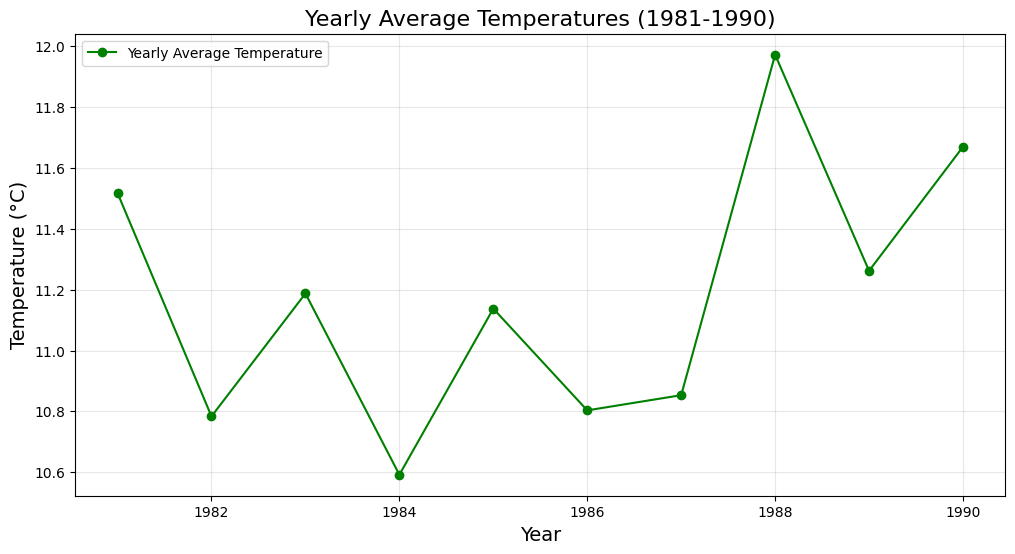

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg, marker='o', label='Yearly Average Temperature', color='green')
plt.title('Yearly Average Temperatures (1981-1990)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

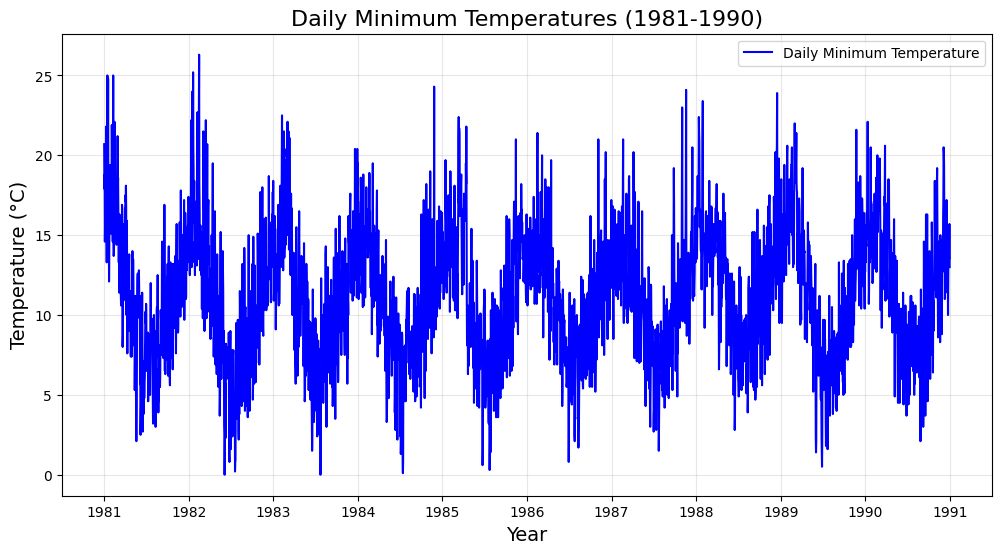

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data['Temp'], label='Daily Minimum Temperature', color='blue')
plt.title('Daily Minimum Temperatures (1981-1990)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

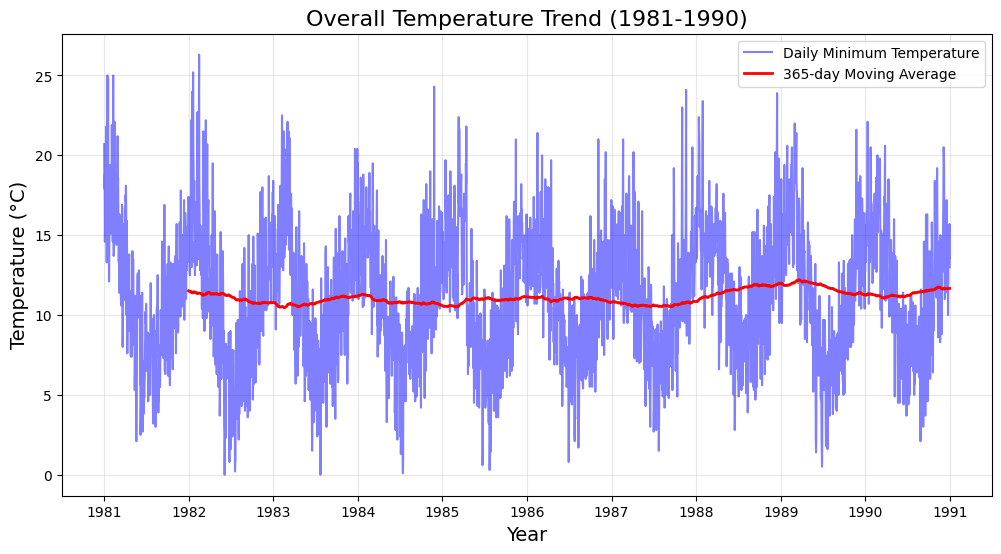

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data['Temp'], label='Daily Minimum Temperature', color='blue', alpha=0.5)
plt.plot(data['365-day Moving Avg'], label='365-day Moving Average', color='red', linewidth=2)
plt.title('Overall Temperature Trend (1981-1990)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [12]:
# Seasonal Decomposition

import statsmodels.api as sm


In [13]:
decomposition = sm.tsa.seasonal_decompose(data['Temp'], model='additive', period=365)

Text(0.5, 1.0, 'Observed Data')

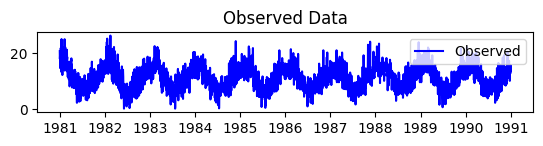

In [14]:
# Observed data
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.legend(loc='upper right')
plt.title('Observed Data')

Text(0.5, 1.0, 'Trend')

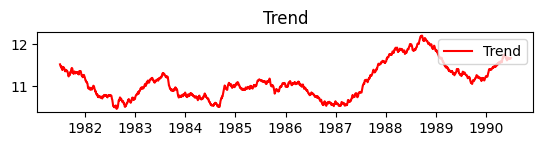

In [15]:
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper right')
plt.title('Trend')


Text(0.5, 1.0, 'Seasonality')

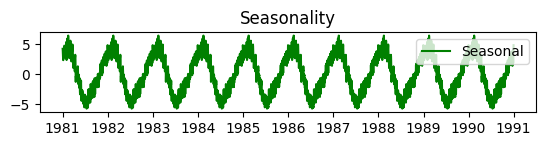

In [16]:
# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper right')
plt.title('Seasonality')

Text(0.5, 1.0, 'Residuals')

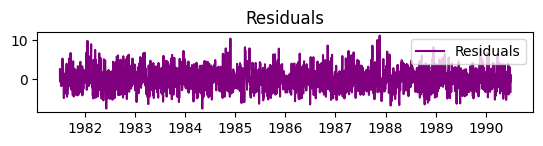

In [17]:
# Residuals
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='purple')
plt.legend(loc='upper right')
plt.title('Residuals')

<ipython-input-6-fdb49d1046a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Month'], y=data['Temp'], palette="coolwarm")


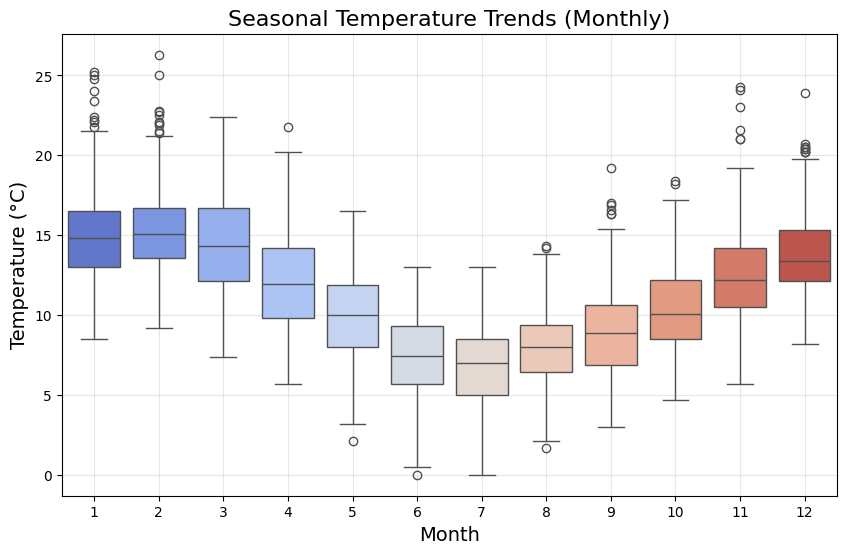

In [ ]:
data['Month'] = data.index.month
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Month'], y=data['Temp'], palette="coolwarm")
plt.title('Seasonal Temperature Trends (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>